In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Problem 1

In [57]:
data=pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [58]:
data=data.drop_duplicates()
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [59]:
scaler=StandardScaler()
x=scaler.fit_transform(data.iloc[:,:-1])
y=data.iloc[:,-1]

In [60]:
#Splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=10)

In [61]:
#Creating Model
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
#Doing prediction
pred=model.predict(x_test)

In [63]:
#Creating classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.57      1.00      0.73         4
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3

    accuracy                           0.80        20
   macro avg       0.58      0.59      0.57        20
weighted avg       0.76      0.80      0.77        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
data["Type"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [65]:
l=[]
for k in range(1,40,2):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  l.append(accuracy_score(y_test,pred))

<function matplotlib.pyplot.show(close=None, block=None)>

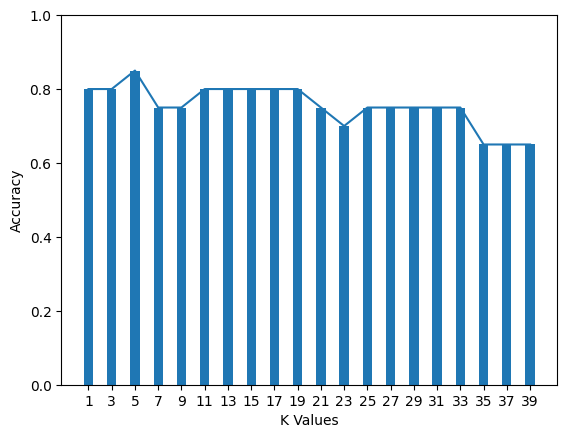

In [66]:
# plt.figure(figsize=(5,5))
plt.bar(range(1,40,2),l)
plt.plot(range(1,40,2),l)
plt.ylim(0,1)
plt.xticks(range(1,40,2))
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show

In [67]:
print("Accuracy", accuracy_score(y_test,pred)*100)

Accuracy 65.0
